In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('global_laptop_selling_data.csv')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [5]:
df.describe()

,laptop_ID,Inches,Ram,Weight,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,8.382195,2.038734,1123.686992
std,381.172104,1.426304,5.084665,0.665475,699.009043
min,1.000000,10.100000,2.000000,0.690000,174.000000
25%,331.500000,14.000000,4.000000,1.500000,599.000000
50%,659.000000,15.600000,8.000000,2.040000,977.000000
75%,990.500000,15.600000,8.000000,2.300000,1487.880000
max,1320.000000,18.400000,64.000000,4.700000,6099.000000


In [6]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               171
Price_euros          791
dtype: int64

# Preprocessing

In [7]:
df = df.drop('laptop_ID', axis=1)

In [8]:
df1 = df.copy()
df1.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [11]:
df.describe()

,Inches,Ram,Weight,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1123.686992
std,1.426304,5.084665,0.665475,699.009043
min,10.100000,2.000000,0.690000,174.000000
25%,14.000000,4.000000,1.500000,599.000000
50%,15.600000,8.000000,2.040000,977.000000
75%,15.600000,8.000000,2.300000,1487.880000
max,18.400000,64.000000,4.700000,6099.000000


In [12]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [13]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [14]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [15]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.head(20)

,Price_euros
Company,
Acer,626.775825
Apple,1564.198571
Asus,1104.169367
Chuwi,314.296667
Dell,1186.068990
Fujitsu,729.000000
Google,1677.666667
HP,1067.774854
Huawei,1424.000000


In [16]:
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)

Text(0.5, 1.0, 'Average Price Per Company')

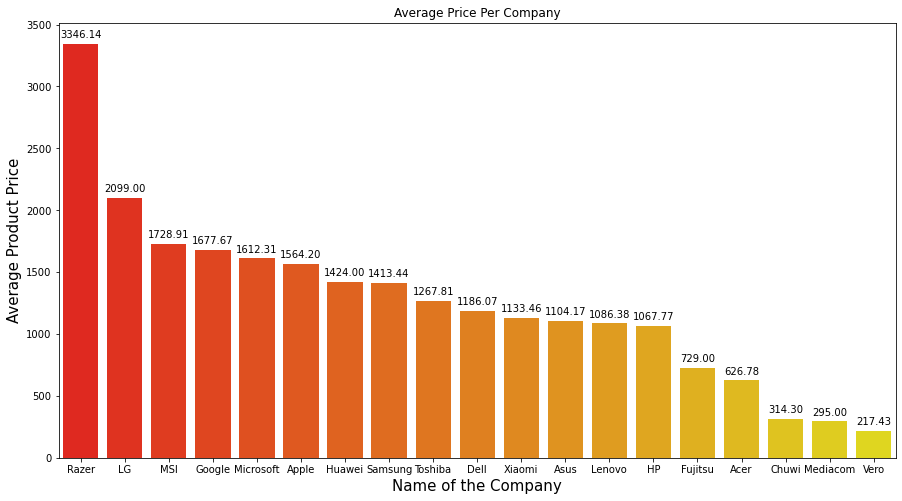

In [17]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

# Encoding

In [18]:
le = LabelEncoder()

In [19]:
from pandas.core.dtypes.common import is_numeric_dtype

In [20]:
for column in df.columns:
    if df[column].dtypes == np.number:
        continue
    df[column] = le.fit_transform(df[column])

C:\Users\ziyed\AppData\Local\Temp\ipykernel_11236\3896503060.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:


In [22]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,3,4,56,8,1.37,1339.69
1,1,301,4,13.3,1,63,3,2,50,8,1.34,898.94
2,7,50,3,15.6,8,74,3,16,52,4,1.86,575.00
3,1,300,4,15.4,25,85,5,29,8,8,1.83,2537.45
4,1,300,4,13.3,23,67,3,16,57,8,1.37,1803.60


# Split data 

In [27]:
x = df.drop(['Price_euros'],axis = 1)
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,300,4,13.3,23,65,3,4,56,8,1.37
1,1,301,4,13.3,1,63,3,2,50,8,1.34
2,7,50,3,15.6,8,74,3,16,52,4,1.86
3,1,300,4,15.4,25,85,5,29,8,8,1.83
4,1,300,4,13.3,23,67,3,16,57,8,1.37


In [76]:
y = df['Price_euros']

In [77]:
from sklearn.model_selection import train_test_split as tts

In [78]:
xtrain,xtest,ytrain,ytest = tts(x,y, test_size = 0.20, random_state = 0)

In [79]:
x.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [80]:
# transformaing data
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [81]:
xtrain

array([[0.22222222, 0.93344156, 0.        , ..., 0.48571429, 0.625     ,
        0.13715711],
       [0.22222222, 0.4025974 , 0.        , ..., 0.4952381 , 0.625     ,
        0.34912718],
       [0.55555556, 0.33603896, 0.6       , ..., 0.40952381, 0.625     ,
        0.3765586 ],
       ...,
       [0.        , 0.16883117, 0.6       , ..., 0.64761905, 0.625     ,
        0.65087282],
       [0.22222222, 0.88636364, 0.6       , ..., 0.2       , 0.625     ,
        0.37157107],
       [0.55555556, 0.9512987 , 0.        , ..., 0.56190476, 0.625     ,
        0.12468828]])

# Regression Model

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [83]:
model1 = LinearRegression()

In [84]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [85]:
model1.score(xtest,ytest)

0.617053669122048

In [96]:
model1.predict(xtest)

array([ 656.23141778, 2168.19651932, 2084.9567549 ,  300.32680272,
       2016.60804114,  418.41449307,  112.68342462,   50.09098896,
       1230.48176122, 1955.10164628, 1423.87598806,  634.00829757,
        -39.53666834, 1290.95653116, 2495.241706  , 1065.51275961,
        389.05977051, 1736.7110528 , 1711.40619799, 1978.69365328,
        336.31341024, 2051.78662994,  531.37566745, 1334.69681107,
        994.88198094,  812.54693802,  717.33080292,  476.31169155,
        709.87801279,  838.87614507,  601.43341785,  704.54161209,
       1352.75253441, 1297.31796477, 2026.14692957, 1338.34145719,
       1727.37382215,  595.03801443, 1134.20947676, 1556.53743412,
       1952.11768478, 1154.09374205, 2674.47277969, 1379.05124292,
       1230.13477805,   43.33331989, 1262.00148674,  549.34070327,
       1510.91249821,   42.0629792 , 1130.55867207, 2283.03906396,
        338.93053869,  902.98082893,  640.1062066 , 1108.15875993,
        468.96563519, 1726.24096997, 1152.55340643, 1478.79278

In [86]:
# Support Vactor Regression
model2 = SVR()

In [87]:
model2.fit(xtrain,ytrain)

SVR()

In [88]:
model2.score(xtest,ytest)

-0.07037743913284156

In [97]:
model2.predict(xtest)

array([ 922.39057227,  993.16468808,  985.4082771 ,  878.75874272,
        995.92230295,  886.08025848,  870.58747475,  903.86419382,
        964.30850119,  993.35134528,  956.14106647,  915.93491382,
        866.18797188,  975.46417073,  988.83718928,  922.1389624 ,
        905.64655893,  999.20742334,  981.58487103,  997.56057817,
        908.19388166, 1004.99463327,  885.12595435,  967.63576303,
        895.29881952,  917.58950356,  915.12269284,  860.58754118,
        898.25519082,  915.27371838,  939.85890014,  931.51391786,
        976.5250543 ,  973.23559003, 1007.54752158,  972.186741  ,
        971.98926408,  913.60186472,  962.26160692,  977.73801799,
       1006.28408812,  972.42473899,  977.01842245,  975.04602027,
        945.59285541,  852.84875381,  968.68988308,  874.97492096,
       1001.72918413,  859.44582041,  924.33875866,  984.4081634 ,
        903.91678742,  902.8107532 ,  879.56147804,  971.13496127,
        891.63107568,  950.22995137,  971.90420761,  974.01705

In [89]:
# Decision Tree Regressor
model3 = DecisionTreeRegressor()

In [90]:
model3.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [91]:
model3.score(xtest,ytest)

0.018991020493802857

In [98]:
model3.predict(xtest)

array([ 255.  , 2799.  , 2800.  ,  932.  , 2968.  ,  564.  ,  399.  ,
        229.  , 1390.  , 3890.  , 1468.  ,  603.  ,  399.  , 1399.  ,
       2800.  ,  894.5 ,  932.  , 2800.  , 2799.  , 2968.  ,  298.  ,
       2800.  ,  539.  , 1465.  ,  805.99,  867.  , 1199.  ,  535.  ,
        805.99, 1299.  , 1090.  ,  720.32,  999.  , 1649.  , 3149.  ,
       1199.  , 2229.  ,  539.  , 1265.  , 2135.  , 2968.  , 1142.8 ,
       6099.  , 1072.  , 1279.  ,  499.  ,  659.  ,  445.9 , 2559.  ,
        575.  ,  745.  , 6099.  ,  462.35, 1296.99,  764.  , 1280.  ,
        349.  , 3890.  , 1142.8 , 1950.  , 1518.55,  509.  ,  999.  ,
       2799.  , 3149.  , 2968.  ,  813.  , 1199.  ,  812.  , 1584.  ,
        779.  , 3890.  , 1749.  ,  462.35,  629.  , 1841.85,  899.  ,
        744.  , 1109.  ,  443.9 ,  689.  , 2799.  ,  535.  , 6099.  ,
       2799.  , 1690.  ,  443.9 , 1154.  ,  735.87, 1199.  , 1669.  ,
       2799.  ,  682.  ,  348.  , 1899.  , 1189.  , 3659.4 ,  414.9 ,
       3975.  , 2799

In [93]:
# Random Forest
model4 = RandomForestRegressor()

In [94]:
model4.fit(xtrain, ytrain)

RandomForestRegressor()

In [95]:
model4.score(xtest,ytest)

0.711273037875418

In [99]:
model4.predict(xtest)

array([ 261.43166   , 2518.7553    , 2221.2101    ,  625.215     ,
       2446.0426    ,  538.4374    ,  382.7199    ,  275.3915    ,
       1239.8816    , 3097.4636    , 1596.4735    ,  674.9332    ,
        378.3633    , 1393.1836    , 3060.2456    ,  830.9454    ,
        619.5953    , 2422.0663    , 2221.7537    , 2461.36623333,
        380.0838    , 2597.76956667,  509.5316    , 1231.3416    ,
        689.1703    ,  759.4457    ,  753.3671    ,  772.02993333,
        769.1476    , 1222.5751    , 1191.0872    ,  716.5648    ,
       1264.33      , 1223.6059    , 2433.36836667, 1378.73      ,
       2194.6086    ,  482.4746    , 1223.6122    , 1763.5033    ,
       2354.1003    , 1153.5158    , 4603.5172    , 1191.221     ,
       1264.4085    ,  513.1435    , 1033.2204    ,  512.5903    ,
       1719.7762    ,  454.9702    ,  786.0251    , 3110.2153    ,
        575.5836    , 1090.4658    ,  733.2634    , 1211.0871    ,
        293.53456667, 2268.66403333, 1140.5509    , 1840.5881 